In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('owid-covid-data.csv')

In [5]:
pd.set_option('display.max_rows',None)
(data.isna().sum()/len(data)).sort_values()

iso_code                                      0.000000
date                                          0.000000
location                                      0.000000
population                                    0.004308
continent                                     0.056452
total_cases                                   0.056760
new_cases                                     0.057891
total_cases_per_million                       0.061068
new_cases_per_million                         0.062200
new_cases_smoothed                            0.063075
new_cases_smoothed_per_million                0.067362
life_expectancy                               0.080985
population_density                            0.126779
total_deaths                                  0.140034
new_deaths                                    0.140255
total_deaths_per_million                      0.144286
new_deaths_per_million                        0.144507
new_deaths_smoothed                           0.145369
new_deaths

In [6]:
data = data[~data['total_deaths'].isna()]

In [15]:
(data.isna().sum()/len(data)).sort_values()

iso_code                                      0.000000
location                                      0.000000
date                                          0.000000
total_cases                                   0.000000
new_cases                                     0.000000
total_deaths                                  0.000000
new_deaths                                    0.000000
new_cases_per_million                         0.000000
new_cases_smoothed                            0.000626
new_deaths_per_million                        0.004955
total_deaths_per_million                      0.004955
population                                    0.004955
total_cases_per_million                       0.004955
new_cases_smoothed_per_million                0.005582
new_deaths_smoothed                           0.005723
new_deaths_smoothed_per_million               0.010653
life_expectancy                               0.064510
continent                                     0.064819
population

In [8]:
data = data[~data['new_deaths'].isna()]

In [10]:
data = data[~data['total_cases'].isna()]

In [12]:
data = data[~data['new_cases'].isna()]

In [14]:
data['new_cases_per_million'] = data['new_cases']/1000000

In [4]:
# data['total_deaths'] = data['total_deaths'].fillna(0)
# data['new_deaths'] = data['new_deaths'].fillna(0)

In [5]:
# data['total_cases'] = data['total_cases'].fillna(0)

In [16]:
data['continent'].value_counts(dropna=False)

Africa           49565
Europe           45182
Asia             43143
North America    28282
NaN              12832
South America    11390
Oceania           7574
Name: continent, dtype: int64

In [17]:
data2=data[data['continent'].isna()==True]

In [18]:
data2['location'].unique()


array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Low income', 'Lower middle income',
       'North America', 'Oceania', 'South America', 'Upper middle income',
       'World'], dtype=object)

In [19]:
data2['iso_code'].unique()

array(['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_HIC',
       'OWID_INT', 'OWID_LIC', 'OWID_LMC', 'OWID_NAM', 'OWID_OCE',
       'OWID_SAM', 'OWID_UMC', 'OWID_WRL'], dtype=object)

In [11]:
data.shape

(230709, 67)

In [20]:
data = data[~data['continent'].isna()]

In [21]:
data.shape

(185136, 67)

In [22]:
pd.set_option('display.max_rows',None)
(data.isna().sum()/len(data)).sort_values()

iso_code                                      0.000000
new_deaths_per_million                        0.000000
total_deaths_per_million                      0.000000
new_cases_per_million                         0.000000
total_cases_per_million                       0.000000
new_deaths                                    0.000000
total_deaths                                  0.000000
population                                    0.000000
new_cases                                     0.000000
total_cases                                   0.000000
date                                          0.000000
location                                      0.000000
continent                                     0.000000
new_cases_smoothed_per_million                0.000589
new_cases_smoothed                            0.000589
life_expectancy                               0.005126
new_deaths_smoothed                           0.006012
new_deaths_smoothed_per_million               0.006012
population

In [23]:
data.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [24]:
drop_columns= ['new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million','new_deaths_smoothed_per_million', 
    'icu_patients', 'hosp_patients','weekly_icu_admissions',
    'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
    'total_tests_per_thousand', 'new_tests_per_thousand','new_tests_smoothed', 
    'new_tests_smoothed_per_thousand','positive_rate', 'tests_per_case',
    'tests_units', 'total_vaccinations', 'people_vaccinated','people_fully_vaccinated',
    'total_boosters','new_vaccinations','new_vaccinations_smoothed',
    'total_vaccinations_per_hundred','people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred''total_boosters_per_hundred',
    'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred',
    'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative','excess_mortality',
    'excess_mortality_cumulative_per_million','reproduction_rate','people_fully_vaccinated_per_hundred',
               'hosp_patients_per_million', 'icu_patients_per_million','total_boosters_per_hundred']


In [25]:
for i in data:
     if i in drop_columns:
            data.drop( i , axis = 1, inplace=True)
        

In [26]:
data.shape

(185136, 29)

In [27]:
pd.set_option('display.max_rows',None)
(data.isna().sum()/len(data)).sort_values()

iso_code                                 0.000000
new_deaths_per_million                   0.000000
total_deaths_per_million                 0.000000
new_cases_per_million                    0.000000
total_cases_per_million                  0.000000
new_deaths                               0.000000
population                               0.000000
new_cases                                0.000000
total_cases                              0.000000
date                                     0.000000
location                                 0.000000
continent                                0.000000
total_deaths                             0.000000
life_expectancy                          0.005126
population_density                       0.032139
diabetes_prevalence                      0.050606
median_age                               0.084392
gdp_per_capita                           0.089372
aged_70_older                            0.089523
cardiovasc_death_rate                    0.092370


In [28]:
data3 = data[data.life_expectancy.isna()]

In [29]:
data3['location'].unique()

array(['Kosovo'], dtype=object)

In [31]:
data['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [97]:
#  data[data['location']=='United Kingdom']#81.32 life expextancy

iso_code continent        location        date  total_cases  new_cases  \
215769      GBR    Europe  United Kingdom  2020-01-30          0.0        NaN   
215770      GBR    Europe  United Kingdom  2020-01-31          2.0        2.0   
215771      GBR    Europe  United Kingdom  2020-02-01          2.0        0.0   
215772      GBR    Europe  United Kingdom  2020-02-02          2.0        0.0   
215773      GBR    Europe  United Kingdom  2020-02-03          8.0        6.0   
215774      GBR    Europe  United Kingdom  2020-02-04          8.0        0.0   
215775      GBR    Europe  United Kingdom  2020-02-05          9.0        1.0   
215776      GBR    Europe  United Kingdom  2020-02-06          9.0        0.0   
215777      GBR    Europe  United Kingdom  2020-02-07          9.0        0.0   
215778      GBR    Europe  United Kingdom  2020-02-08         13.0        4.0   
215779      GBR    Europe  United Kingdom  2020-02-09         14.0        1.0   
215780      GBR    Europe  United Kingdom  2020-02-10         14.0        0.0   
215781      GBR    Europe  United Kingdom  2020-02-11         15.0        1.0   
215782      GBR    Europe  United Kingdom  2020-02-12         16.0        1.0   
215783      GBR    Europe  United Kingdom  2020-02-13         17.0        1.0   
215784      GBR    Europe  United Kingdom  2020-02-14         18.0        1.0   
215785      GBR    Europe  United Kingdom  2020-02-15         18.0        0.0   
215786      GBR    Europe  United Kingdom  2020-02-16         18.0        0.0   
215787      GBR    Europe  United Kingdom  2020-02-17         19.0        1.0   
215788      GBR    Europe  United Kingdom  2020-02-18         19.0        0.0   
215789      GBR    Europe  United Kingdom  2020-02-19         20.0        1.0   
215790      GBR    Europe  United Kingdom  2020-02-20         22.0        2.0   
215791      GBR    Europe  United Kingdom  2020-02-21         23.0        1.0   
215792      GBR    Europe  United Kingdom  2020-02-22         23.0        0.0   
215793      GBR    Europe  United Kingdom  2020-02-23         28.0        5.0   
215794      GBR    Europe  United Kingdom  2020-02-24         30.0        2.0   
215795      GBR    Europe  United Kingdom  2020-02-25         34.0        4.0   
215796      GBR    Europe  United Kingdom  2020-02-26         37.0        3.0   
215797      GBR    Europe  United Kingdom  2020-02-27         44.0        7.0   
215798      GBR    Europe  United Kingdom  2020-02-28         56.0       12.0   
215799      GBR    Europe  United Kingdom  2020-02-29         61.0        5.0   
215800      GBR    Europe  United Kingdom  2020-03-01         94.0       33.0   
215801      GBR    Europe  United Kingdom  2020-03-02        134.0       40.0   
215802      GBR    Europe  United Kingdom  2020-03-03        189.0       55.0   
215803      GBR    Europe  United Kingdom  2020-03-04        245.0       56.0   
215804      GBR    Europe  United Kingdom  2020-03-05        294.0       49.0   
215805      GBR    Europe  United Kingdom  2020-03-06        373.0       79.0   
215806      GBR    Europe  United Kingdom  2020-03-07        428.0       55.0   
215807      GBR    Europe  United Kingdom  2020-03-08        482.0       54.0   
215808      GBR    Europe  United Kingdom  2020-03-09        629.0      147.0   
215809      GBR    Europe  United Kingdom  2020-03-10        887.0      258.0   
215810      GBR    Europe  United Kingdom  2020-03-11       1298.0      411.0   
215811      GBR    Europe  United Kingdom  2020-03-12       1787.0      489.0   
215812      GBR    Europe  United Kingdom  2020-03-13       2266.0      479.0   
215813      GBR    Europe  United Kingdom  2020-03-14       2630.0      364.0   
215814      GBR    Europe  United Kingdom  2020-03-15       3072.0      442.0   
215815      GBR    Europe  United Kingdom  2020-03-16       3684.0      612.0   
215816      GBR    Europe  United Kingdom  2020-03-17       4452.0      768.0   
215817      GBR    Europe  United King

In [98]:
# data[(data['location'].isin(['England']))]

iso_code continent location        date  total_cases  new_cases  \
60546  OWID_ENG    Europe  England  2020-03-20          0.0        NaN   
60547  OWID_ENG    Europe  England  2020-03-21          0.0        NaN   
60548  OWID_ENG    Europe  England  2020-03-22          0.0        NaN   
60549  OWID_ENG    Europe  England  2020-03-23          0.0        NaN   
60550  OWID_ENG    Europe  England  2020-03-24          0.0        NaN   
60551  OWID_ENG    Europe  England  2020-03-25          0.0        NaN   
60552  OWID_ENG    Europe  England  2020-03-26          0.0        NaN   
60553  OWID_ENG    Europe  England  2020-03-27          0.0        NaN   
60554  OWID_ENG    Europe  England  2020-03-28          0.0        NaN   
60555  OWID_ENG    Europe  England  2020-03-29          0.0        NaN   
60556  OWID_ENG    Europe  England  2020-03-30          0.0        NaN   
60557  OWID_ENG    Europe  England  2020-03-31          0.0        NaN   
60558  OWID_ENG    Europe  England  2020-04-01          0.0        NaN   
60559  OWID_ENG    Europe  England  2020-04-02          0.0        NaN   
60560  OWID_ENG    Europe  England  2020-04-03          0.0        NaN   
60561  OWID_ENG    Europe  England  2020-04-04          0.0        NaN   
60562  OWID_ENG    Europe  England  2020-04-05          0.0        NaN   
60563  OWID_ENG    Europe  England  2020-04-06          0.0        NaN   
60564  OWID_ENG    Europe  England  2020-04-07          0.0        NaN   
60565  OWID_ENG    Europe  England  2020-04-08          0.0        NaN   
60566  OWID_ENG    Europe  England  2020-04-09          0.0        NaN   
60567  OWID_ENG    Europe  England  2020-04-10          0.0        NaN   
60568  OWID_ENG    Europe  England  2020-04-11          0.0        NaN   
60569  OWID_ENG    Europe  England  2020-04-12          0.0        NaN   
60570  OWID_ENG    Europe  England  2020-04-13          0.0        NaN   
60571  OWID_ENG    Europe  England  2020-04-14          0.0        NaN   
60572  OWID_ENG    Europe  England  2020-04-15          0.0        NaN   
60573  OWID_ENG    Europe  England  2020-04-16          0.0        NaN   
60574  OWID_ENG    Europe  England  2020-04-17          0.0        NaN   
60575  OWID_ENG    Europe  England  2020-04-18          0.0        NaN   
60576  OWID_ENG    Europe  England  2020-04-19          0.0        NaN   
60577  OWID_ENG    Europe  England  2020-04-20          0.0        NaN   
60578  OWID_ENG    Europe  England  2020-04-21          0.0        NaN   
60579  OWID_ENG    Europe  England  2020-04-22          0.0        NaN   
60580  OWID_ENG    Europe  England  2020-04-23          0.0        NaN   
60581  OWID_ENG    Europe  England  2020-04-24          0.0        NaN   
60582  OWID_ENG    Europe  England  2020-04-25          0.0        NaN   
60583  OWID_ENG    Europe  England  2020-04-26          0.0        NaN   
60584  OWID_ENG    Europe  England  2020-04-27          0.0        NaN   
60585  OWID_ENG    Europe  England  2020-04-28          0.0        NaN   
60586  OWID_ENG    Europe  England  2020-04-29          0.0        NaN   
60587  OWID_ENG    Europe  England  2020-04-30          0.0        NaN   
60588  OWID_ENG    Europe  England  2020-05-01          0.0        NaN   
60589  OWID_ENG    Europe  England  2020-05-02          0.0        NaN   
60590  OWID_ENG    Europe  England  2020-05-03          0.0        NaN   
60591  OWID_ENG    Europe  England  2020-05-04          0.0        NaN   
60592  OWID_ENG    Europe  England  2020-05-05          0.0        NaN   
60593  OWID_ENG    Europe  England  2020-05-06          0.0        NaN   
60594  OWID_ENG    Europe  England  2020-05-07          0.0        NaN   
60595  OWID_ENG    Europe  England  2020-05-08          0.0        NaN   
60596  OWID_ENG    Europe  England  2020-05-09          0.0        NaN   
60597  OWID_ENG    Europe  England  2020-05-10          0.0        NaN   
60598  OWID_ENG    Europe  England  2020-05-11          0.0        NaN   
60599  OWID

In [99]:
#  data[data['location']=='Turkey']#77.69 life expextancy

iso_code continent location        date  total_cases  new_cases  \
209838      TUR      Asia   Turkey  2020-03-11          1.0        1.0   
209839      TUR      Asia   Turkey  2020-03-12          1.0        0.0   
209840      TUR      Asia   Turkey  2020-03-13          5.0        4.0   
209841      TUR      Asia   Turkey  2020-03-14          5.0        0.0   
209842      TUR      Asia   Turkey  2020-03-15          6.0        1.0   
209843      TUR      Asia   Turkey  2020-03-16         18.0       12.0   
209844      TUR      Asia   Turkey  2020-03-17         47.0       29.0   
209845      TUR      Asia   Turkey  2020-03-18         98.0       51.0   
209846      TUR      Asia   Turkey  2020-03-19        192.0       94.0   
209847      TUR      Asia   Turkey  2020-03-20        359.0      167.0   
209848      TUR      Asia   Turkey  2020-03-21        670.0      311.0   
209849      TUR      Asia   Turkey  2020-03-22       1236.0      566.0   
209850      TUR      Asia   Turkey  2020-03-23       1529.0      293.0   
209851      TUR      Asia   Turkey  2020-03-24       1872.0      343.0   
209852      TUR      Asia   Turkey  2020-03-25       2433.0      561.0   
209853      TUR      Asia   Turkey  2020-03-26       3629.0     1196.0   
209854      TUR      Asia   Turkey  2020-03-27       5698.0     2069.0   
209855      TUR      Asia   Turkey  2020-03-28       7402.0     1704.0   
209856      TUR      Asia   Turkey  2020-03-29       9217.0     1815.0   
209857      TUR      Asia   Turkey  2020-03-30      10827.0     1610.0   
209858      TUR      Asia   Turkey  2020-03-31      13531.0     2704.0   
209859      TUR      Asia   Turkey  2020-04-01      15679.0     2148.0   
209860      TUR      Asia   Turkey  2020-04-02      18135.0     2456.0   
209861      TUR      Asia   Turkey  2020-04-03      20921.0     2786.0   
209862      TUR      Asia   Turkey  2020-04-04      23934.0     3013.0   
209863      TUR      Asia   Turkey  2020-04-05      27069.0     3135.0   
209864      TUR      Asia   Turkey  2020-04-06      30217.0     3148.0   
209865      TUR      Asia   Turkey  2020-04-07      34109.0     3892.0   
209866      TUR      Asia   Turkey  2020-04-08      38226.0     4117.0   
209867      TUR      Asia   Turkey  2020-04-09      42282.0     4056.0   
209868      TUR      Asia   Turkey  2020-04-10      47029.0     4747.0   
209869      TUR      Asia   Turkey  2020-04-11      52167.0     5138.0   
209870      TUR      Asia   Turkey  2020-04-12      56956.0     4789.0   
209871      TUR      Asia   Turkey  2020-04-13      61049.0     4093.0   
209872      TUR      Asia   Turkey  2020-04-14      65111.0     4062.0   
209873      TUR      Asia   Turkey  2020-04-15      69392.0     4281.0   
209874      TUR      Asia   Turkey  2020-04-16      74193.0     4801.0   
209875      TUR      Asia   Turkey  2020-04-17      78546.0     4353.0   
209876      TUR      Asia   Turkey  2020-04-18      82329.0     3783.0   
209877      TUR      Asia   Turkey  2020-04-19      86306.0     3977.0   
209878      TUR      Asia   Turkey  2020-04-20      90980.0     4674.0   
209879      TUR      Asia   Turkey  2020-04-21      95591.0     4611.0   
209880      TUR      Asia   Turkey  2020-04-22      98674.0     3083.0   
209881      TUR      Asia   Turkey  2020-04-23     101790.0     3116.0   
209882      TUR      Asia   Turkey  2020-04-24     104912.0     3122.0   
209883      TUR      Asia   Turkey  2020-04-25     107773.0     2861.0   
209884      TUR      Asia   Turkey  2020-04-26     110130.0     2357.0   
209885      TUR      Asia   Turkey  2020-04-27     112261.0     2131.0   
209886      TUR      Asia   Turkey  2020-04-28     114653.0     2392.0   
209887      TUR      Asia   Turkey  2020-04-29     117589.0     2936.0   
209888      TUR      Asia   Turkey  2020-04-30     120204.0     2615.0   
209889      TUR      Asia   Turkey  2020-05-01     122392.0     2188.0   
209890      TUR      Asia   Turkey  2020-05-02     124375.0     1983.0   
209891     

In [100]:
#  data[data['location']=='Serbia']#76.00 life expextancy

iso_code continent location        date  total_cases  new_cases  \
182202      SRB    Europe   Serbia  2020-02-26          0.0        NaN   
182203      SRB    Europe   Serbia  2020-02-27          0.0        NaN   
182204      SRB    Europe   Serbia  2020-02-28          0.0        NaN   
182205      SRB    Europe   Serbia  2020-02-29          0.0        NaN   
182206      SRB    Europe   Serbia  2020-03-01          0.0        NaN   
182207      SRB    Europe   Serbia  2020-03-02          0.0        NaN   
182208      SRB    Europe   Serbia  2020-03-03          0.0        NaN   
182209      SRB    Europe   Serbia  2020-03-04          0.0        NaN   
182210      SRB    Europe   Serbia  2020-03-05          0.0        NaN   
182211      SRB    Europe   Serbia  2020-03-06          1.0        1.0   
182212      SRB    Europe   Serbia  2020-03-07          1.0        0.0   
182213      SRB    Europe   Serbia  2020-03-08          1.0        0.0   
182214      SRB    Europe   Serbia  2020-03-09          1.0        0.0   
182215      SRB    Europe   Serbia  2020-03-10          5.0        4.0   
182216      SRB    Europe   Serbia  2020-03-11         12.0        7.0   
182217      SRB    Europe   Serbia  2020-03-12         19.0        7.0   
182218      SRB    Europe   Serbia  2020-03-13         35.0       16.0   
182219      SRB    Europe   Serbia  2020-03-14         46.0       11.0   
182220      SRB    Europe   Serbia  2020-03-15         48.0        2.0   
182221      SRB    Europe   Serbia  2020-03-16         55.0        7.0   
182222      SRB    Europe   Serbia  2020-03-17         65.0       10.0   
182223      SRB    Europe   Serbia  2020-03-18         83.0       18.0   
182224      SRB    Europe   Serbia  2020-03-19        103.0       20.0   
182225      SRB    Europe   Serbia  2020-03-20        135.0       32.0   
182226      SRB    Europe   Serbia  2020-03-21        171.0       36.0   
182227      SRB    Europe   Serbia  2020-03-22        222.0       51.0   
182228      SRB    Europe   Serbia  2020-03-23        249.0       27.0   
182229      SRB    Europe   Serbia  2020-03-24        303.0       54.0   
182230      SRB    Europe   Serbia  2020-03-25        384.0       81.0   
182231      SRB    Europe   Serbia  2020-03-26        384.0        0.0   
182232      SRB    Europe   Serbia  2020-03-27        457.0       73.0   
182233      SRB    Europe   Serbia  2020-03-28        659.0      202.0   
182234      SRB    Europe   Serbia  2020-03-29        741.0       82.0   
182235      SRB    Europe   Serbia  2020-03-30        785.0       44.0   
182236      SRB    Europe   Serbia  2020-03-31        900.0      115.0   
182237      SRB    Europe   Serbia  2020-04-01       1060.0      160.0   
182238      SRB    Europe   Serbia  2020-04-02       1171.0      111.0   
182239      SRB    Europe   Serbia  2020-04-03       1476.0      305.0   
182240      SRB    Europe   Serbia  2020-04-04       1624.0      148.0   
182241      SRB    Europe   Serbia  2020-04-05       1908.0      284.0   
182242      SRB    Europe   Serbia  2020-04-06       2200.0      292.0   
182243      SRB    Europe   Serbia  2020-04-07       2447.0      247.0   
182244      SRB    Europe   Serbia  2020-04-08       2666.0      219.0   
182245      SRB    Europe   Serbia  2020-04-09       2867.0      201.0   
182246      SRB    Europe   Serbia  2020-04-10       3105.0      238.0   
182247      SRB    Europe   Serbia  2020-04-11       3380.0      275.0   
182248      SRB    Europe   Serbia  2020-04-12       3630.0      250.0   
182249      SRB    Europe   Serbia  2020-04-13       4054.0      424.0   
182250      SRB    Europe   Serbia  2020-04-14       4465.0      411.0   
182251      SRB    Europe   Serbia  2020-04-15       4873.0      408.0   
182252      SRB    Europe   Serbia  2020-04-16       5318.0      445.0   
182253      SRB    Europe   Serbia  2020-04-17       5690.0      372.0   
182254      SRB    Europe   Serbia  2020-04-18       5994.0      304.0   
182255     

In [32]:
data['life_expectancy'].describe(include="all")

count    184187.000000
mean         73.437198
std           7.625699
min          53.280000
25%          67.940000
50%          75.050000
75%          78.920000
max          86.750000
Name: life_expectancy, dtype: float64

In [102]:
# for i in data['location']:
#     if i == 'England':
#         data['life_expectancy'].fillna(81.32)

In [103]:
# data[data['location']=='England']

iso_code continent location        date  total_cases  new_cases  \
60546  OWID_ENG    Europe  England  2020-03-20          0.0        NaN   
60547  OWID_ENG    Europe  England  2020-03-21          0.0        NaN   
60548  OWID_ENG    Europe  England  2020-03-22          0.0        NaN   
60549  OWID_ENG    Europe  England  2020-03-23          0.0        NaN   
60550  OWID_ENG    Europe  England  2020-03-24          0.0        NaN   
60551  OWID_ENG    Europe  England  2020-03-25          0.0        NaN   
60552  OWID_ENG    Europe  England  2020-03-26          0.0        NaN   
60553  OWID_ENG    Europe  England  2020-03-27          0.0        NaN   
60554  OWID_ENG    Europe  England  2020-03-28          0.0        NaN   
60555  OWID_ENG    Europe  England  2020-03-29          0.0        NaN   
60556  OWID_ENG    Europe  England  2020-03-30          0.0        NaN   
60557  OWID_ENG    Europe  England  2020-03-31          0.0        NaN   
60558  OWID_ENG    Europe  England  2020-04-01          0.0        NaN   
60559  OWID_ENG    Europe  England  2020-04-02          0.0        NaN   
60560  OWID_ENG    Europe  England  2020-04-03          0.0        NaN   
60561  OWID_ENG    Europe  England  2020-04-04          0.0        NaN   
60562  OWID_ENG    Europe  England  2020-04-05          0.0        NaN   
60563  OWID_ENG    Europe  England  2020-04-06          0.0        NaN   
60564  OWID_ENG    Europe  England  2020-04-07          0.0        NaN   
60565  OWID_ENG    Europe  England  2020-04-08          0.0        NaN   
60566  OWID_ENG    Europe  England  2020-04-09          0.0        NaN   
60567  OWID_ENG    Europe  England  2020-04-10          0.0        NaN   
60568  OWID_ENG    Europe  England  2020-04-11          0.0        NaN   
60569  OWID_ENG    Europe  England  2020-04-12          0.0        NaN   
60570  OWID_ENG    Europe  England  2020-04-13          0.0        NaN   
60571  OWID_ENG    Europe  England  2020-04-14          0.0        NaN   
60572  OWID_ENG    Europe  England  2020-04-15          0.0        NaN   
60573  OWID_ENG    Europe  England  2020-04-16          0.0        NaN   
60574  OWID_ENG    Europe  England  2020-04-17          0.0        NaN   
60575  OWID_ENG    Europe  England  2020-04-18          0.0        NaN   
60576  OWID_ENG    Europe  England  2020-04-19          0.0        NaN   
60577  OWID_ENG    Europe  England  2020-04-20          0.0        NaN   
60578  OWID_ENG    Europe  England  2020-04-21          0.0        NaN   
60579  OWID_ENG    Europe  England  2020-04-22          0.0        NaN   
60580  OWID_ENG    Europe  England  2020-04-23          0.0        NaN   
60581  OWID_ENG    Europe  England  2020-04-24          0.0        NaN   
60582  OWID_ENG    Europe  England  2020-04-25          0.0        NaN   
60583  OWID_ENG    Europe  England  2020-04-26          0.0        NaN   
60584  OWID_ENG    Europe  England  2020-04-27          0.0        NaN   
60585  OWID_ENG    Europe  England  2020-04-28          0.0        NaN   
60586  OWID_ENG    Europe  England  2020-04-29          0.0        NaN   
60587  OWID_ENG    Europe  England  2020-04-30          0.0        NaN   
60588  OWID_ENG    Europe  England  2020-05-01          0.0        NaN   
60589  OWID_ENG    Europe  England  2020-05-02          0.0        NaN   
60590  OWID_ENG    Europe  England  2020-05-03          0.0        NaN   
60591  OWID_ENG    Europe  England  2020-05-04          0.0        NaN   
60592  OWID_ENG    Europe  England  2020-05-05          0.0        NaN   
60593  OWID_ENG    Europe  England  2020-05-06          0.0        NaN   
60594  OWID_ENG    Europe  England  2020-05-07          0.0        NaN   
60595  OWID_ENG    Europe  England  2020-05-08          0.0        NaN   
60596  OWID_ENG    Europe  England  2020-05-09          0.0        NaN   
60597  OWID_ENG    Europe  England  2020-05-10          0.0        NaN   
60598  OWID_ENG    Europe  England  2020-05-11          0.0        NaN   
60599  OWID

In [104]:
# import numpy as np    
# data['life_expectancy'] = np.where(data['life_expectancy'].isnull()==True, np.median, data['life_expectancy'],)

In [33]:
data['life_expectancy'].isna().sum()

949

In [34]:
data['life_expectancy'] = data['life_expectancy'].fillna(data['life_expectancy'].median())

In [35]:
# data[data['location']=='England']#76.00 life expextancy

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, total_deaths, new_deaths, total_cases_per_million, new_cases_per_million, total_deaths_per_million, new_deaths_per_million, new_vaccinations_smoothed_per_million, stringency_index, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, population]
Index: []

[0 rows x 29 columns]

In [36]:
(data.isna().sum()/len(data)).sort_values()

iso_code                                 0.000000
life_expectancy                          0.000000
new_deaths_per_million                   0.000000
total_deaths_per_million                 0.000000
new_cases_per_million                    0.000000
total_cases_per_million                  0.000000
new_deaths                               0.000000
population                               0.000000
new_cases                                0.000000
total_cases                              0.000000
date                                     0.000000
location                                 0.000000
continent                                0.000000
total_deaths                             0.000000
population_density                       0.032139
diabetes_prevalence                      0.050606
median_age                               0.084392
gdp_per_capita                           0.089372
aged_70_older                            0.089523
cardiovasc_death_rate                    0.092370


In [28]:
# data['total_cases_per_million'] = data['total_cases']/1000000

In [29]:
(data.isna().sum()/len(data)).sort_values()

iso_code                                 0.000000
life_expectancy                          0.000000
total_cases_per_million                  0.000000
new_deaths                               0.000000
total_deaths                             0.000000
population                               0.000000
total_cases                              0.000000
date                                     0.000000
location                                 0.000000
continent                                0.000000
new_cases_per_million                    0.061355
new_cases                                0.061355
population_density                       0.079174
diabetes_prevalence                      0.106705
total_deaths_per_million                 0.147530
median_age                               0.148357
new_deaths_per_million                   0.148586
cardiovasc_death_rate                    0.150681
gdp_per_capita                           0.151044
aged_70_older                            0.152836


In [30]:
# data = data[~data['new_cases'].isna()]

In [31]:
#  data = data[~data['new_cases_per_million'].isna()]

In [32]:
data.shape

(204329, 29)

In [37]:
data['total_deaths_per_million'] = data['total_deaths']/1000000

In [38]:
data['new_deaths_per_million'] = data['new_deaths']/1000000

In [39]:
(data.isna().sum()/len(data)).sort_values()

iso_code                                 0.000000
life_expectancy                          0.000000
new_deaths_per_million                   0.000000
total_deaths_per_million                 0.000000
new_cases_per_million                    0.000000
total_cases_per_million                  0.000000
new_deaths                               0.000000
population                               0.000000
new_cases                                0.000000
total_cases                              0.000000
date                                     0.000000
location                                 0.000000
continent                                0.000000
total_deaths                             0.000000
population_density                       0.032139
diabetes_prevalence                      0.050606
median_age                               0.084392
gdp_per_capita                           0.089372
aged_70_older                            0.089523
cardiovasc_death_rate                    0.092370


In [40]:
data['population_density'].describe(include="all")

count    179186.000000
mean        376.099627
std        1688.846335
min           0.137000
25%          37.312000
50%          85.129000
75%         212.841000
max       20546.766000
Name: population_density, dtype: float64

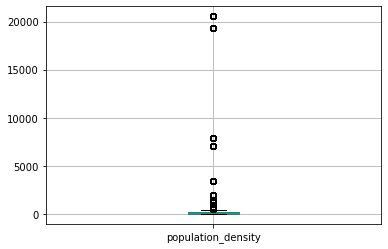

C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='population_density', ylabel='Density'>

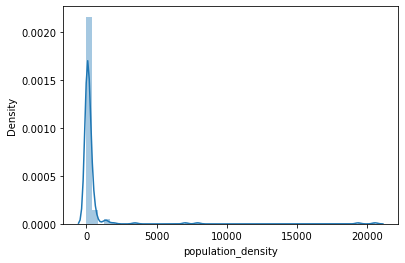

In [37]:
data[['population_density']].boxplot()
plt.show()
sns.distplot(data['population_density'])

C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='population_density', ylabel='Density'>

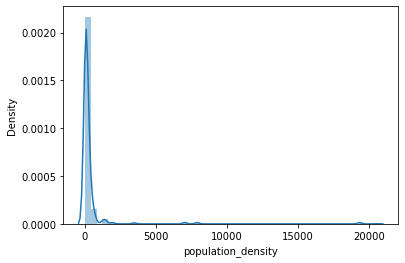

In [41]:
import seaborn as sns
sns.distplot(data['population_density'])

In [42]:
data['population_density'] = data['population_density'].fillna(data['population_density'].median())

In [43]:
data['diabetes_prevalence'].describe(include="all") 

count    175767.000000
mean          7.984669
std           4.130543
min           0.990000
25%           5.310000
50%           7.110000
75%          10.180000
max          30.530000
Name: diabetes_prevalence, dtype: float64

C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes_prevalence', ylabel='Density'>

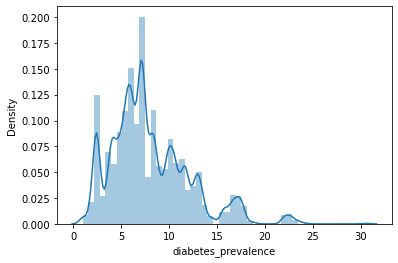

In [44]:
sns.distplot(data['diabetes_prevalence'])

In [45]:
data['diabetes_prevalence'] = data['diabetes_prevalence'].fillna(data['diabetes_prevalence'].median())

In [46]:
data['gdp_per_capita'].describe(include="all") 

count    168590.000000
mean      19562.951320
std       20071.482186
min         661.240000
25%        4466.507000
50%       13111.214000
75%       27936.896000
max      116935.600000
Name: gdp_per_capita, dtype: float64

C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gdp_per_capita', ylabel='Density'>

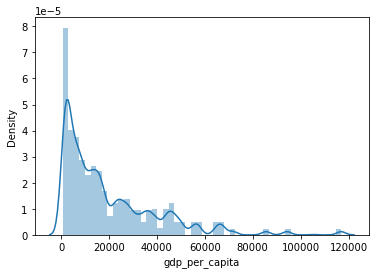

In [47]:
sns.distplot(data['gdp_per_capita'])

In [57]:
data['gdp_per_capita'] = data['gdp_per_capita'].fillna(data['gdp_per_capita'].median())

C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_age', ylabel='Density'>

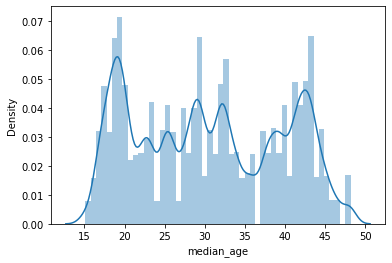

In [46]:
sns.distplot(data['median_age'])

In [48]:
data['median_age'].describe(include="all") 

count    169512.000000
mean         30.626080
std           9.197321
min          15.100000
25%          22.000000
50%          29.900000
75%          39.100000
max          48.200000
Name: median_age, dtype: float64

In [49]:
data['median_age'] = data['median_age'].fillna(data['median_age'].mean())

In [50]:
data['aged_70_older'].describe(include="all") 

count    168562.000000
mean          5.592366
std           4.243970
min           0.526000
25%           2.034000
50%           3.915000
75%           9.167000
max          18.493000
Name: aged_70_older, dtype: float64

C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aged_70_older', ylabel='Density'>

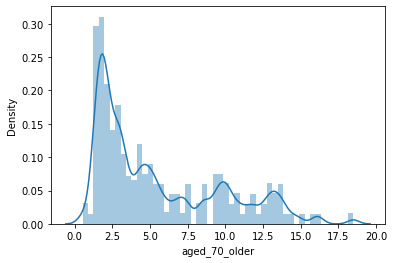

In [50]:
sns.distplot(data['aged_70_older'])

In [51]:
data['aged_70_older'] = data['aged_70_older'].fillna(data['aged_70_older'].median())

In [52]:
data['aged_70_older'].describe(include="all") 

count    185136.000000
mean          5.442202
std           4.077766
min           0.526000
25%           2.155000
50%           3.915000
75%           8.563000
max          18.493000
Name: aged_70_older, dtype: float64

In [53]:
draw_columns=['cardiovasc_death_rate','aged_65_older','human_development_index'
              , 'stringency_index','hospital_beds_per_thousand', 'female_smokers',
               'male_smokers','extreme_poverty','handwashing_facilities', 'new_vaccinations_smoothed_per_million']

count    115881.000000
mean       2363.828298
std        3298.736252
min           0.000000
25%         273.000000
50%        1133.000000
75%        3214.000000
max      117113.000000
Name: new_vaccinations_smoothed_per_million, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


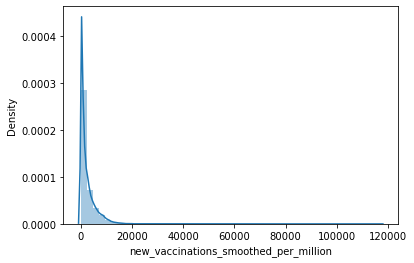

count    158765.000000
mean         48.143831
std          22.394606
min           0.000000
25%          31.480000
50%          47.240000
75%          65.740000
max         100.000000
Name: stringency_index, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


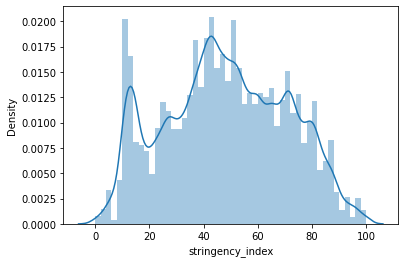

count    167586.000000
mean          8.840088
std           6.234590
min           1.144000
25%           3.402000
50%           6.614000
75%          14.431000
max          27.049000
Name: aged_65_older, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


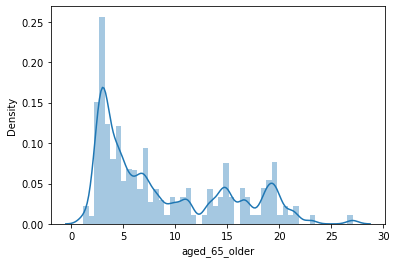

count    113083.000000
mean         13.640181
std          20.295199
min           0.100000
25%           0.500000
50%           2.200000
75%          21.200000
max          77.600000
Name: extreme_poverty, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


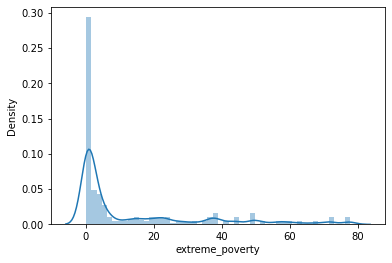

count    168035.000000
mean        257.650474
std         119.003373
min          79.370000
25%         164.905000
50%         242.648000
75%         329.635000
max         724.417000
Name: cardiovasc_death_rate, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


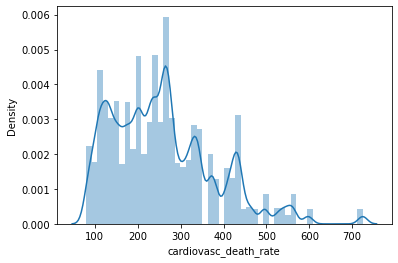

count    131623.00000
mean         10.62578
std          10.57375
min           0.10000
25%           1.90000
50%           6.20000
75%          19.30000
max          44.00000
Name: female_smokers, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


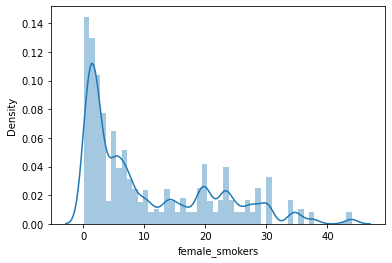

count    129723.000000
mean         32.499779
std          13.434276
min           7.700000
25%          21.400000
50%          31.200000
75%          41.100000
max          78.100000
Name: male_smokers, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


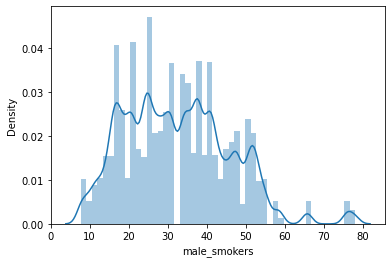

count    84007.000000
mean        50.123742
std         32.164333
min          1.188000
25%         19.275000
50%         47.964000
75%         83.241000
max         98.999000
Name: handwashing_facilities, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


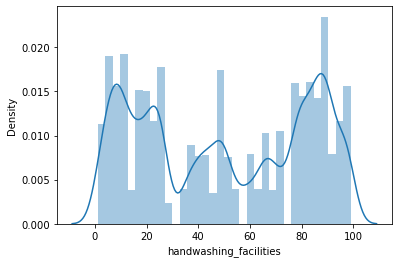

count    152265.000000
mean          3.038989
std           2.496313
min           0.100000
25%           1.300000
50%           2.397000
75%           4.000000
max          13.800000
Name: hospital_beds_per_thousand, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


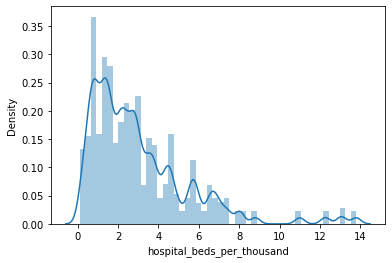

count    167400.000000
mean          0.726664
std           0.152047
min           0.394000
25%           0.601000
50%           0.750000
75%           0.851000
max           0.957000
Name: human_development_index, dtype: float64


C:\IronHack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


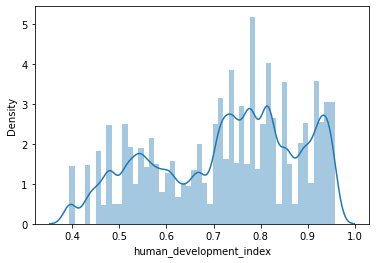

In [54]:
# for i in range(len(data)):
#     sns.distplot(data.iloc[:,i])
#     plt.show()
for i in data:
     if i in draw_columns:
            print(data[i].describe()) 
            sns.distplot(data[i])
            plt.show()


In [55]:
for i in data:
     if i in draw_columns:
            data[i]=data[i].fillna(data[i].median())

In [58]:
(data.isna().sum()/len(data)).sort_values()

iso_code                                 0.0
life_expectancy                          0.0
hospital_beds_per_thousand               0.0
handwashing_facilities                   0.0
male_smokers                             0.0
female_smokers                           0.0
diabetes_prevalence                      0.0
cardiovasc_death_rate                    0.0
extreme_poverty                          0.0
gdp_per_capita                           0.0
aged_70_older                            0.0
aged_65_older                            0.0
median_age                               0.0
human_development_index                  0.0
population_density                       0.0
new_vaccinations_smoothed_per_million    0.0
new_deaths_per_million                   0.0
total_deaths_per_million                 0.0
new_cases_per_million                    0.0
total_cases_per_million                  0.0
new_deaths                               0.0
total_deaths                             0.0
new_cases 

In [59]:
data.shape

(185136, 29)

In [60]:
data.to_csv("C:/Users/Yuga 14/Desktop/final project/crona/covid_data2.csv", index=False)